#### Cryptography

#### Task № 8 - Shamir Secret Sharing

#### Ivan Rybin - ITMO JB SE MA 2021

In [1]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import sympy as sp
import sympy.abc
import matplotlib.pyplot as plt

In [2]:
def is_prime(n: int) -> bool:
    if n <= 1:
        return False
    i = 2
    while (i - 1) * (i - 1) < n:
        if n % i == 0:
            return False
        i += 1
    return True


def find_prime(lower: int, upper: int):
    for i in range(lower, upper + 1):
        if is_prime(i):
            return i
    return None


def gen_poly_and_prime(n: int, lowerC: int, upperC: int, lowerP: int, upperP: int):
    p = find_prime(lowerP, upperP)
    while True:
        is_good = True
        coefs = []
        for i in range(0, n - 1):
            c = np.random.randint(lowerC, upperC)
            if c >= p:
                is_good = False
                break
            coefs.append(c)
                
        if is_good:
            return p, coefs
        
def calc_poly(coefs, x):
    res = 0
    for i in range(0, len(coefs[:-1])):
        res += coefs[i] * pow(x, len(coefs[:-1]) - i)
    return res + coefs[-1]    
    

def interpolate_poly(xs, ys):
    poly = lagrange(xs, ys)
    return Polynomial(poly).coef


def print_points(xs, ys):
    print([(x,y) for x, y in zip(xs, ys)])

In [3]:
def SHAMIR_ENCODE(m: int, n: int, msg: int):
    p, coefs = gen_poly_and_prime(m, 100, 500, 700, 1000)
    coefs.append(msg)
    xs = [i for i in range(1, n + 1)]
    ys = [calc_poly(coefs, x) % p for x in xs]
    return p, coefs, xs, ys


def SHAMIR_DECODE(xs, ys, m):
    return interpolate_poly(xs[:m], ys[:m])

In [4]:
n = 10
m = 5
msg = 42

print("INPUT MESSAGE   ", msg)
print("TOTAL KEYS      ", n)
print("SHARED TO DECODE", m)

INPUT MESSAGE    42
TOTAL KEYS       10
SHARED TO DECODE 5


In [5]:
p, coefs, xs, ys = SHAMIR_ENCODE(m, n, msg)
decoded = SHAMIR_DECODE(xs, ys, m)

In [6]:
print("GENERATED PRIME =", p)
print("GENERATED POLY")
sp.init_printing()
sp.Poly(coefs, sympy.abc.x).as_expr()

GENERATED PRIME = 701
GENERATED POLY


POINTS BY MODULO 701
[(1, 345), (2, 563), (3, 220), (4, 78), (5, 34), (6, 522), (7, 410), (8, 505), (9, 48), (10, 219)]


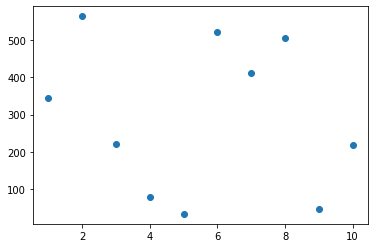

In [7]:
print("POINTS BY MODULO", p)
print_points(xs, ys)
plt.scatter(xs, ys)
plt.show()

POLY AFTER LAGRANGE


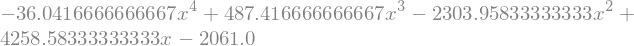

In [8]:
print("POLY AFTER LAGRANGE")
sp.init_printing()
sp.Poly(decoded, sympy.abc.x).as_expr()

POLY AFTER LAGRANGE BY MODULO P


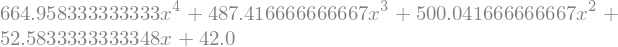

In [9]:
print("POLY AFTER LAGRANGE BY MODULO P")
sp.init_printing()
sp.Poly(decoded % p, sympy.abc.x).as_expr()

In [10]:
print("MESSAGE IS", decoded[-1] % p)

MESSAGE IS 42.0
